# Chapter 3

In the chapter 3 of "Web Scraping with Python" you were able to learn more about the following subjects:
* Tracking internal links of website
  * According to pattern
  * All internal links
* Website mapping
* Collecting data
* Tracking through internet

The following cells aim to practice the contents listed above. For any sugestions, contact *gabriel.vasconcelos@usp.br*

Use the website https://scraping-cap3.netlify.app/ to answer this notebook.

In [1]:
# Import BeautifulSoup and other libraries you find useful

from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import networkx as nx

from urllib.request import urlopen
from urllib.error import HTTPError, URLError
from urllib.parse import urlparse

import re, random

In [2]:
# Get the website https://scraping-cap3.netlify.app/ and pass it to a BeautifulSoup object 
# with proper error handling

def getBS(site):
    try:
        html = urlopen(site)
    except HTTPError as e:
        return None
    except URLError as e:
        return None
    bs = BeautifulSoup(html, 'html.parser')
    return bs

In [67]:
def makeInternalURL(link: str):
    url = 'https://scraping-cap3.netlify.app/'
    if link.startswith('./'):
        url += link[2:]
    elif link.startswith('../'):
        url += link[3:]
    elif link.startswith('/'):
        url += link[1:]
    else:
        url = link
    
    return url

def getInternalLinks(site):
    site = makeInternalURL(site)
    
    bs = getBS(site)
    
    if not bs:
        return {}
        
    domain = urlparse(site).netloc
    urls = [a['href'] for a in bs.find_all('a', 
        {'href':re.compile(f'(^(\.)*\/.+)|(^http(s?):\/\/.*?{domain}.*?)')})]
    return set(urls)

#print(getInternalLinks('https://scraping-cap3.netlify.app/baixistas'))

def getExternalLinksOfPage(site):
    site = makeInternalURL(site)
    
    bs = getBS(site)
    
    if not bs:
        return None
        
    all_urls = set([a['href'] for a in bs.find_all('a', {'href':re.compile('(^http(s?).+)')})])
    in_urls  = getInternalLinks(site)

    all_urls.difference_update(in_urls)
    return (all_urls,in_urls)

### a.
Get all internal links from the domain.

In [4]:
# Code below
# Tip: use BFS algorithm to do a full mapping of the domain

def getAllInternalLinks(url):
    sites = [url]
    visited = set()

    while(len(sites) > 0):
        site = makeInternalURL(sites.pop(0))
        visited.add(site)
        bs = getBS(site)
        urls = getInternalLinks(site)
        
        for url in urls:
            url = makeInternalURL(url)
            if(not url in visited and not url in sites):
                sites.append(url)
    
    return visited

In [5]:
internalLink =  getAllInternalLinks('https://scraping-cap3.netlify.app/index.html')
internalLink

{'https://scraping-cap3.netlify.app/baixistas.html',
 'https://scraping-cap3.netlify.app/baixistas/Dee_Dee_Ramone.html',
 'https://scraping-cap3.netlify.app/baixistas/Geezer_Butler.html',
 'https://scraping-cap3.netlify.app/baixistas/John_Paul_Jones.html',
 'https://scraping-cap3.netlify.app/baixistas/Krist_Novoselic.html',
 'https://scraping-cap3.netlify.app/baixistas/Paul_McCartney.html',
 'https://scraping-cap3.netlify.app/baixistas/Roger_Glover.html',
 'https://scraping-cap3.netlify.app/baixistas/Simon_Gallup.html',
 'https://scraping-cap3.netlify.app/bandas.html',
 'https://scraping-cap3.netlify.app/bandas/Black_Sabbath.html',
 'https://scraping-cap3.netlify.app/bandas/Deep_Purple.html',
 'https://scraping-cap3.netlify.app/bandas/Led_Zeppelin.html',
 'https://scraping-cap3.netlify.app/bandas/Nirvana.html',
 'https://scraping-cap3.netlify.app/bandas/Ramones.html',
 'https://scraping-cap3.netlify.app/bandas/The_Beatles.html',
 'https://scraping-cap3.netlify.app/bandas/The_Cure.html'

### b.
Get all external links from the domain.

In [6]:
# Code below
def getAllExternalLinks(link):
    allExtLink = set()
    sites = [link]
    visited = set(link)

    while(len(sites) > 0):
        site = makeInternalURL(sites.pop(0))
        visited.add(site)
        
        ex_urls, in_urls = getExternalLinksOfPage(site)
        allExtLink.update(ex_urls)
        
        for url in in_urls:
            url = makeInternalURL(url)
            if((not url in visited) and (not url in sites)):
                sites.append(url)
    
    return allExtLink

In [7]:
external_links = getAllExternalLinks('https://scraping-cap3.netlify.app/index.html')
external_links

{'https://github.com/kibonusp',
 'https://www.linkedin.com/in/gabrielfreitas-xv/'}

### c.
Get the title of each page in the website, its url and the first paragraph.

In [8]:
data = []

def getDataFromPages(link):
    allExtLink = set()
    sites = [link]
    visited = set(link)

    while(len(sites) > 0):
        site = makeInternalURL(sites.pop(0))
        visited.add(site)
        
        bsObj = getBS(site)
        page = site
        first_parag = None
        title = None
        if bsObj.p:
            first_parag = bsObj.p.text
        if bsObj.title:
            title = bsObj.title.text
    
        data.append({'url':page, 'title':title, 'firstParag':first_parag}) 
            
        in_urls = getInternalLinks(site)
        for url in in_urls:
            url = makeInternalURL(url)
            if((not url in visited) and (not url in sites)):
                sites.append(url)
    return data

In [9]:
getDataFromPages('https://scraping-cap3.netlify.app/index.html')

[{'url': 'https://scraping-cap3.netlify.app/index.html',
  'title': 'Página Inicial',
  'firstParag': "Site que  busca juntar a informação sobre as melhoras bandas de rock!! Let's go, kids!"},
 {'url': 'https://scraping-cap3.netlify.app/guitarristas.html',
  'title': 'Guitarristas',
  'firstParag': None},
 {'url': 'https://scraping-cap3.netlify.app/bateristas.html',
  'title': 'Bateristas',
  'firstParag': None},
 {'url': 'https://scraping-cap3.netlify.app/vocalistas.html',
  'title': 'Vocalistas',
  'firstParag': None},
 {'url': 'https://scraping-cap3.netlify.app/baixistas.html',
  'title': 'Baixistas',
  'firstParag': None},
 {'url': 'https://scraping-cap3.netlify.app/bandas.html',
  'title': 'Bandas',
  'firstParag': None},
 {'url': 'https://scraping-cap3.netlify.app/tecladistas.html',
  'title': 'Tecladistas',
  'firstParag': None},
 {'url': 'https://scraping-cap3.netlify.app/guitarristas/George_Harrison.html',
  'title': 'George Harrison',
  'firstParag': 'George Harrison[nota 1] 

### d.
Create an adjacency list of the domain (directed graph).

In [10]:
def getGraph(link):
    adjacencyList = {}
    sites = [link]
    visited = set(link)

    while(len(sites) > 0):
        site = makeInternalURL(sites.pop(0))
        visited.add(site)
        
        in_urls = getInternalLinks(site)
        adjacencyList[site] = list([makeInternalURL(url) for url in in_urls])
        
        for url in in_urls:
            url = makeInternalURL(url)
            if((not url in visited) and (not url in sites)):
                sites.append(url)
    return adjacencyList

In [11]:
adjacencyList = getGraph('https://scraping-cap3.netlify.app/index.html')

In [12]:
adjacencyList

{'https://scraping-cap3.netlify.app/index.html': ['https://scraping-cap3.netlify.app/guitarristas.html',
  'https://scraping-cap3.netlify.app/bateristas.html',
  'https://scraping-cap3.netlify.app/index.html',
  'https://scraping-cap3.netlify.app/vocalistas.html',
  'https://scraping-cap3.netlify.app/baixistas.html',
  'https://scraping-cap3.netlify.app/bandas.html',
  'https://scraping-cap3.netlify.app/tecladistas.html'],
 'https://scraping-cap3.netlify.app/guitarristas.html': ['https://scraping-cap3.netlify.app/guitarristas/George_Harrison.html',
  'https://scraping-cap3.netlify.app/guitarristas.html',
  'https://scraping-cap3.netlify.app/guitarristas/Ritchie_Blackmore.html',
  'https://scraping-cap3.netlify.app/bateristas.html',
  'https://scraping-cap3.netlify.app/index.html',
  'https://scraping-cap3.netlify.app/guitarristas/Jimmy_Page.html',
  'https://scraping-cap3.netlify.app/vocalistas.html',
  'https://scraping-cap3.netlify.app/baixistas.html',
  'https://scraping-cap3.netlif

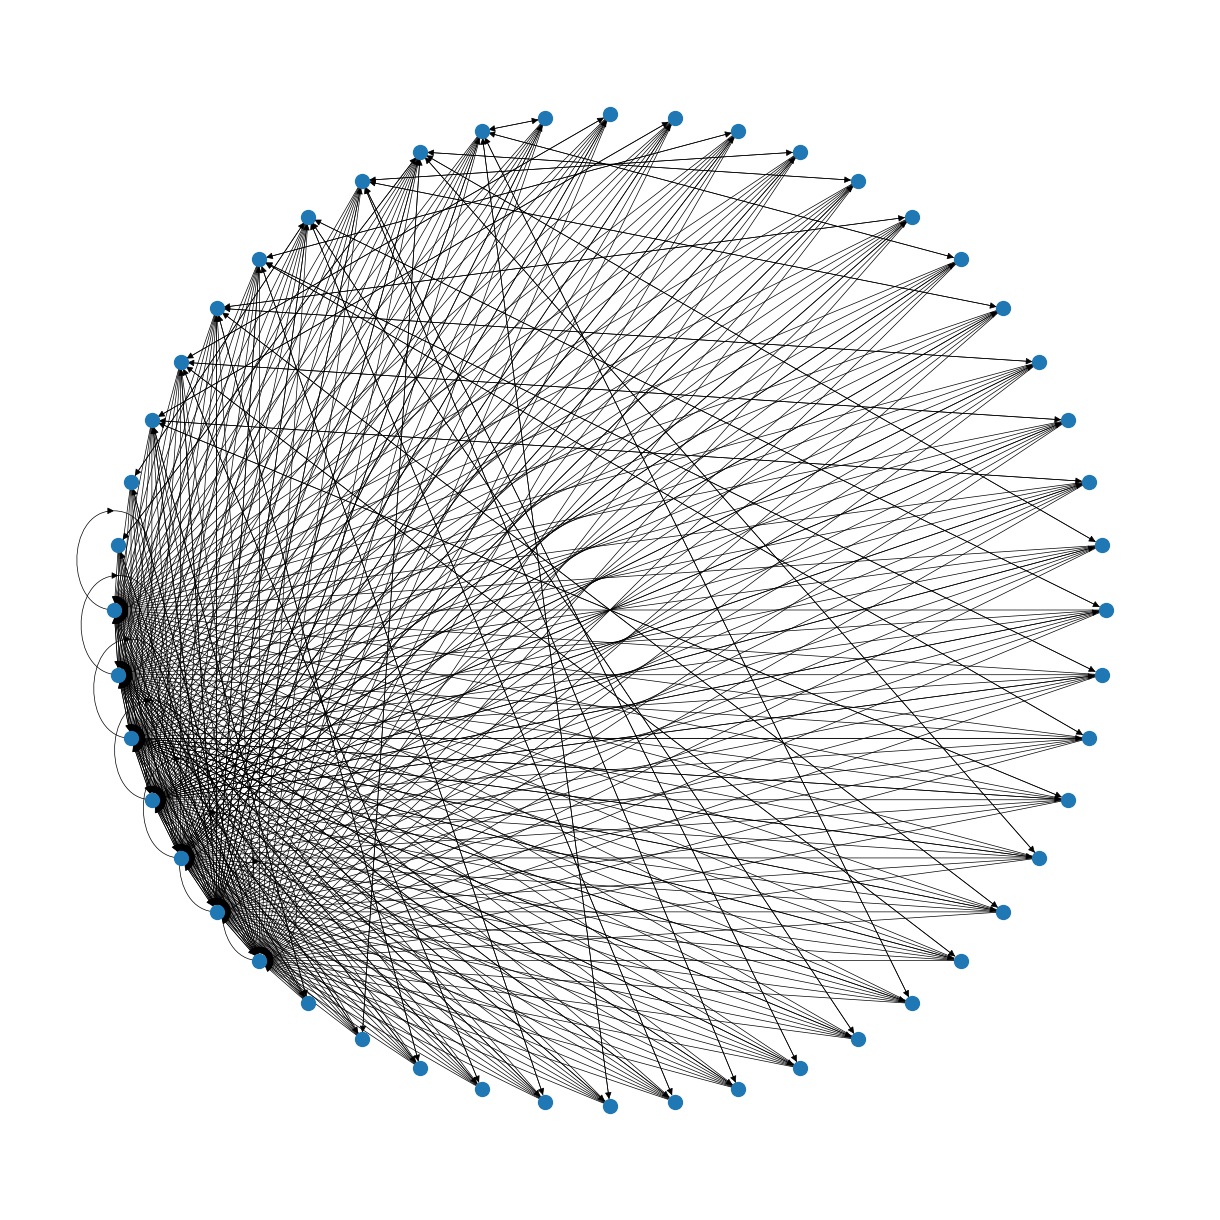

In [13]:
# Use networkx to generate a visualization of the graph
'''
Create an adjacency list in the following format:

adjacencyList = {
    'node A': ['nodeB', 'nodeC'],
    'node B': ['node C']
}
'''

G = nx.DiGraph()

for fromSite in adjacencyList:
    for toSite in adjacencyList[fromSite]:
        G.add_edge(fromSite, toSite)
        
nodes = list(G.nodes)
for node in nodes:
    if len(node) == 1:
        print(node)
        G.remove_node(node)
        
plt.figure(3,figsize=(12,12)) 
nx.draw(G, pos=nx.shell_layout(G), node_size=100, width=0.5)
plt.show()

### e.
From the website external links, choose one randomly and create a internet crawler.

In [70]:
def crawler(site):
    found = True
    listSite = [site]

    while found:
        print(site)
        bs = getBS(site)
        site = getNextExternalPage(site)

        if not site:
            found = False
        else:
            listSite.append(site)

    return listSite

def getNextExternalPage(link):
    extLinks = getExternalLinksOfPage(link)
    #print(extLinks)

    if extLinks and len(extLinks[0]) > 0:
        return random.choice(list(extLinks[0]))
    else:
        intLinks = getInternalLinks(link)
        for intLink in intLinks:
            extLinks = getNextExternalPage(intLink)

            if extLinks:
                return extLinks

        return None 

In [72]:
print(crawler('https://scraping-cap3.netlify.app/index.html'))

https://scraping-cap3.netlify.app/index.html
https://github.com/kibonusp
https://camo.githubusercontent.com/34fba927e0d89f691112f4f1c29ed3d5137e2479178041328d13fc23b8e586ee/68747470733a2f2f6b6f6d617265762e636f6d2f67687076632f3f757365726e616d653d6b69626f6e757370267374796c653d666c6174
['https://scraping-cap3.netlify.app/index.html', 'https://github.com/kibonusp', 'https://camo.githubusercontent.com/34fba927e0d89f691112f4f1c29ed3d5137e2479178041328d13fc23b8e586ee/68747470733a2f2f6b6f6d617265762e636f6d2f67687076632f3f757365726e616d653d6b69626f6e757370267374796c653d666c6174']
